# Исследование факторов, влияющих на оценки студентов на экзаменах

## Цели
#### 1. Понять, как различные факторы (экономические, социальные, личные) влияют на оценки студентов на экзаменах 
#### 2. Познакомиться с библиотекой seaborn.
#### 3. Построить простейшие предсказательные модели

## Источник
https://www.kaggle.com/datasets

#### Импортируем необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Зафиксируем минимальный балл для сдачи экзамена

In [2]:
passmark = 40

#### Считайте данные из csv файла StudentsPerformance.csv

In [3]:
df = pd.read_csv("StudentsPerformance.csv")

#### Напечатаем первые несколько строк в таблице

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Выведите на экран размеры полученной таблицы

In [5]:
#your code here

df.shape

(1000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Выведите на экран статистические характеристики числовых столбцов таблицы (минимум, максимум, среднее значение, стандартное отклонение)

In [7]:
#your code here
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


C:\Users\elena\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


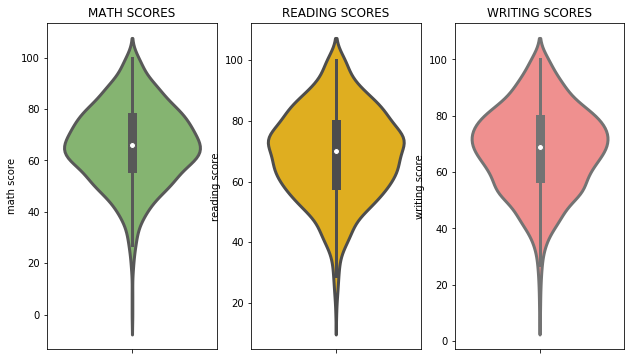

In [8]:
plt.figure(figsize=(14,6))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,palette='summer',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,palette='Wistia_r',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,palette='spring',linewidth=3)
plt.show()

Из графиков видно, что большинство студентов набрали 60-80 по математике и 50-80 по чтению и письму.

#### Проверьте, есть ли в таблице пропущенные значения

In [9]:
#your code here
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**Посмотрим, как зависят оценки от того, проходил ли студент курс для подготовки к сдаче экзамена (test preparation course)
и от пола (gender)**

Постройте график (гистограмму, любую нравящуюся вам визуализацию) зависимости оценок по математике (math score) от test preparation course и от gender. То же самое - для оценок за reading и writing.

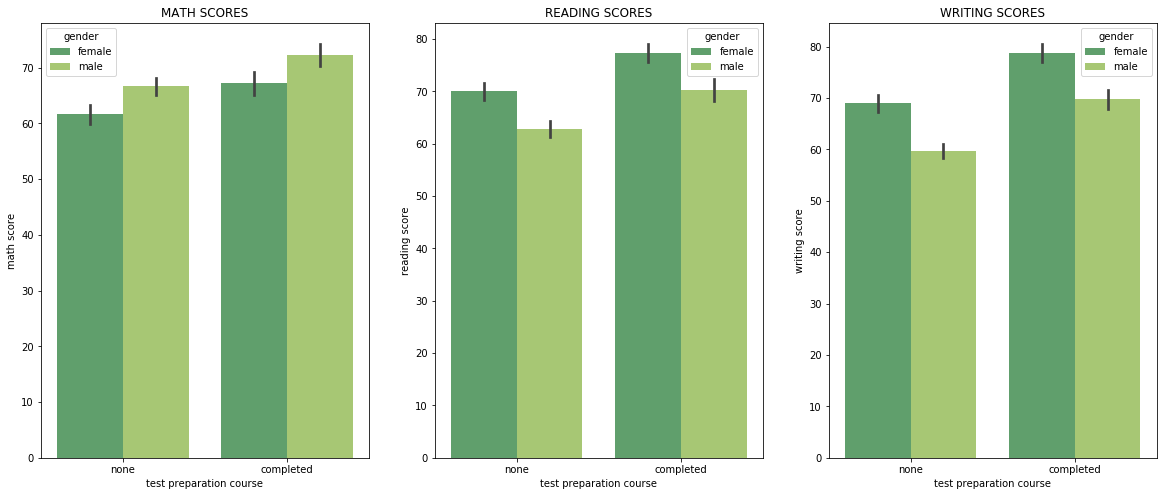

In [10]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',data=df,hue='gender',\
           palette='summer')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=df,hue='gender',\
           palette='summer')
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',data=df,hue='gender',\
           palette='summer')
plt.title('WRITING SCORES')
plt.show()

Какие выводы можно сделать из этих графиков?

Сделайте выводы и напишите их в этой ячейке.

In [11]:
sns.__version__

'0.9.0'

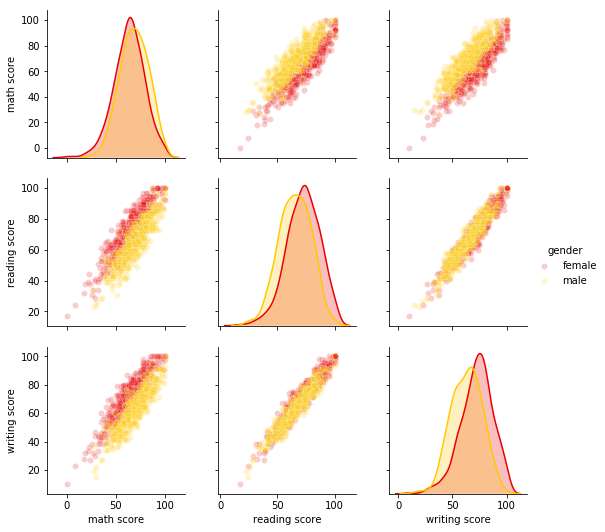

In [12]:
sns.pairplot(data=df,hue='gender',plot_kws={'alpha':0.2},palette='hot')

Как влияет lunch на оценки?

Выведите на экран все различные значения из столбца lunch

In [14]:
#your code here
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

Постройте barplot, отражающий зависимость оценок по math от test preparation course; сделайте разделение по 'lunch'.
То же самое - для reading и writing.

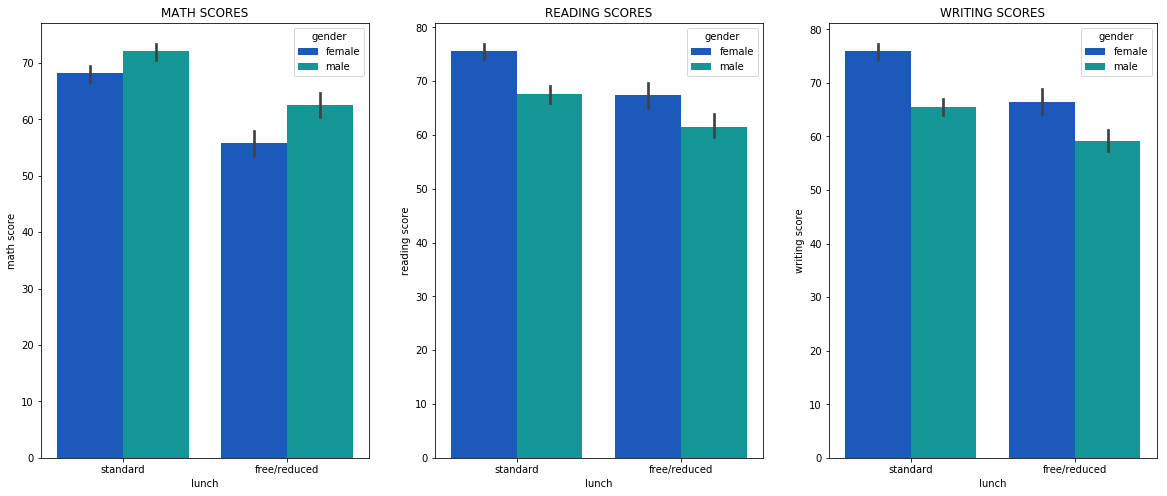

In [16]:
#your code here
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
sns.barplot(x='lunch',y='math score',data=df,hue='gender',\
           palette='winter')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='lunch',y='reading score',data=df,hue='gender',\
           palette='winter')
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='lunch',y='writing score',data=df,hue='gender',\
           palette='winter')
plt.title('WRITING SCORES')
plt.show()

Как зависят баллы от типа lunch?

####  Исследуем оценки по математике (Math)

Постройте гистограмму (plt.hist или sns.countplot) распределения оценок студентов по математике.

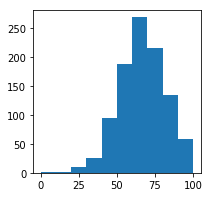

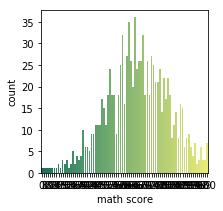

In [22]:
#your code here
plt.figure(figsize=(3,3))
plt.hist(df['math score'])
plt.show()

plt.figure(figsize=(3,3))
sns.countplot(x='math score',data=df,palette='summer')
plt.show()

#### Сколько студентов успешно сдали экзамен по математике?

Создайте новый столбец в таблице df под названием Math_PassStatus и запишите в него F, если студент не сдал экзамен по математике (балл за экзамен < passmark), и P иначе.

Посчитайте количество студентов, сдавших и не сдавших экзамен по математике.

In [23]:
#your code here
df['Math_PassStatus'] = np.where(df['math score'] < passmark, 'F', 'P')

#or

df['Math_PassStatus'] = df['math score'].apply(lambda x: 'F' if x < passmark \
                                              else 'P')

In [24]:
df.Math_PassStatus

0      P
1      P
2      P
3      P
4      P
5      P
6      P
7      P
8      P
9      F
10     P
11     P
12     P
13     P
14     P
15     P
16     P
17     F
18     P
19     P
20     P
21     P
22     P
23     P
24     P
25     P
26     P
27     P
28     P
29     P
      ..
970    P
971    P
972    P
973    P
974    P
975    P
976    P
977    P
978    P
979    P
980    F
981    P
982    P
983    P
984    P
985    P
986    P
987    P
988    P
989    P
990    P
991    P
992    P
993    P
994    P
995    P
996    P
997    P
998    P
999    P
Name: Math_PassStatus, Length: 1000, dtype: object

Как зависит успех сдачи экзамена от уровня образования? 

Постройте гистограмму (countplot) распределения студентов по уровням образования

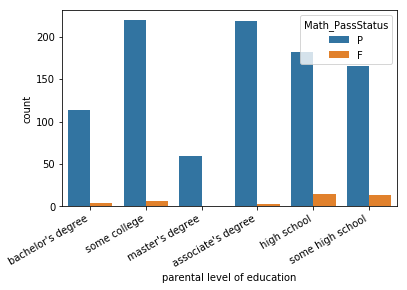

In [27]:
#your code here
fig,ax=plt.subplots()
sns.countplot(x='parental level of education',data=df,hue='Math_PassStatus')
fig.autofmt_xdate()

### Можно сделать подписи наклонными.

In [ ]:
fig,ax = plt.subplots()
#your code (countplot) here
fig.autofmt_xdate()

Создайте countplot, отображающий зависимость Math_PassStatus от parental level of education 

In [ ]:
#your code here

In [28]:
df['Reading_PassStatus'] = np.where(df['reading score'] < passmark, 'F', 'P')
df['Writing_PassStatus'] = np.where(df['writing score'] < passmark, 'F', 'P')

#### Исследуем оценки за чтение (Reading)

Повторите предыдущие шаги

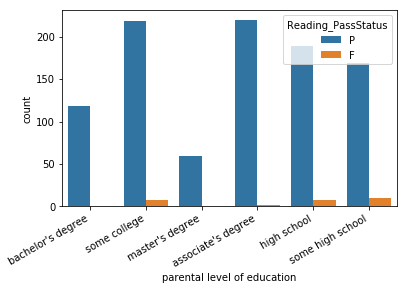

In [29]:
#your code here
fig,ax=plt.subplots()
sns.countplot(x='parental level of education',data=df,hue='Reading_PassStatus')
fig.autofmt_xdate()

#### Исследуем оценки за письмо (Writing)

Повторите предыдущие шаги

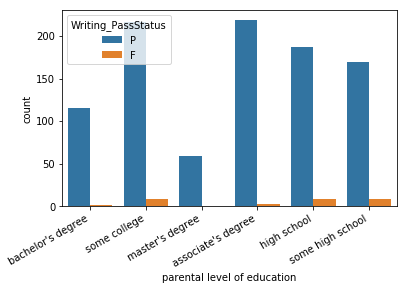

In [30]:
#your code here
fig,ax=plt.subplots()
sns.countplot(x='parental level of education',data=df,hue='Writing_PassStatus')
fig.autofmt_xdate()

#### Сколько студентов успешно сдали все экзамены?

Создайте столбец OverAll_PassStatus и запишите в него для каждого студента 'F', если студент не сдал хотя бы один из трех экзаменов, а иначе 'P'.

Посчитайте количество студентов, которые сдали все экзамены.

In [33]:
#your code here
df['OverAll_PassStatus'] = df.apply(lambda x: 'P' if x['Math_PassStatus'] == 'P' and \
                                                     x['Reading_PassStatus'] == 'P' and \
                                                     x['Writing_PassStatus'] == 'P' \
                                         else 'F', axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,P
4,male,group C,some college,standard,none,76,78,75,P,P,P,P


Создайте диаграмму, отображающую зависимость OverAll_PassStatus от parental level of education

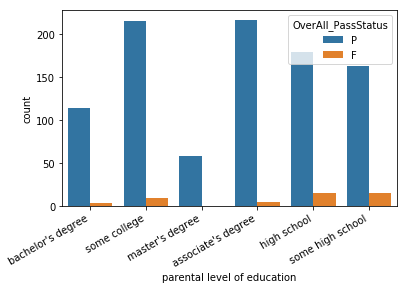

In [38]:
#your code here
fig,ax=plt.subplots()
sns.countplot(x='parental level of education',hue='OverAll_PassStatus',data=df)
fig.autofmt_xdate()

#### Найдите распределение средней оценки за все экзамены

Создайте столбец Total_Marks и запишите в него суммарный балл каждого студента за все дисциплины.

Создайте столбец Percentage, в который запишите средний балл студента за все дисциплины.

Нарисуйте гистограмму распределения среднего балла.

In [40]:
#your code here
df['Total_Marks'] = df['math score'] + df['reading score'] + df['writing score']
df['Percentage'] = df['Total_Marks'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Total_Marks,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,P,148,49.333333
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,229,76.333333


**Итоговый балл в зависимости от уровня образования**

In [ ]:
fig,ax=plt.subplots()
sns.barplot(x='parental level of education',y='Total_Marks',data=df,palette='Wistia')
fig.autofmt_xdate()

#### Переведем баллы в оценки

### Система перевода баллов в оценки
####    больше 80 = A
####      70-80 = B
####      60-70 = C
####      50-60 = D
####      40-50 = E
####    меньше 40 = F (Fail)

Создайте вспомогательную функцию, которая будет по среднему баллу выставлять оценку студенту по данным выше критериям.

Создайте столбец Grade и запишите в него оценку каждого студента.

Выведите количество студентов, получивших каждую из оценок.

In [44]:
def GetGrade(Percentage):
    if Percentage > 80:
        return 'A'
    elif Percentage > 70:
        return 'B'
    elif Percentage > 60:
        return 'C'
    elif Percentage > 50:
        return 'D'
    elif Percentage > 40:
        return 'E'
    return 'F'
    #your code here
    
df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage']), axis=1)

#your code here
df.Grade[:5]

0    B
1    A
2    A
3    E
4    B
Name: Grade, dtype: object

#### Нарисуем распределение полученных оценок

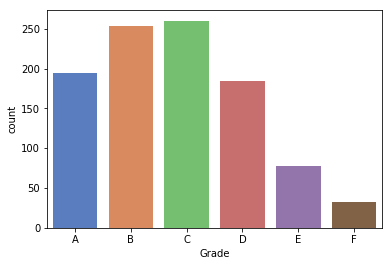

In [45]:
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

Нарисуйте гистограмму распределения оценок в зависимости от уровня образования.

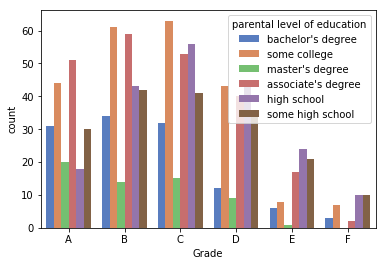

In [46]:
#your code here
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'], \
              hue = 'parental level of education',\
              palette="muted")
plt.show()

Посмотрим на лучших студентов

In [47]:
df[(df['math score'] > 90) & (df['reading score'] > 90) & (df['writing score']>90)]\
.sort_values(by=['Total_Marks'],ascending=False)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Total_Marks,Percentage,Grade
962,female,group E,associate's degree,standard,none,100,100,100,P,P,P,P,300,100.000000,A
458,female,group E,bachelor's degree,standard,none,100,100,100,P,P,P,P,300,100.000000,A
916,male,group E,bachelor's degree,standard,completed,100,100,100,P,P,P,P,300,100.000000,A
114,female,group E,bachelor's degree,standard,completed,99,100,100,P,P,P,P,299,99.666667,A
179,female,group D,some high school,standard,completed,97,100,100,P,P,P,P,297,99.000000,A
712,female,group D,some college,standard,none,98,100,99,P,P,P,P,297,99.000000,A
625,male,group D,some college,standard,completed,100,97,99,P,P,P,P,296,98.666667,A
165,female,group C,bachelor's degree,standard,completed,96,100,100,P,P,P,P,296,98.666667,A
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,P,P,P,P,293,97.666667,A
149,male,group E,associate's degree,free/reduced,completed,100,100,93,P,P,P,P,293,97.666667,A


Посмотрим на распределение оценок в зависимости от пола для каждой этнической группы

C:\Users\elena\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


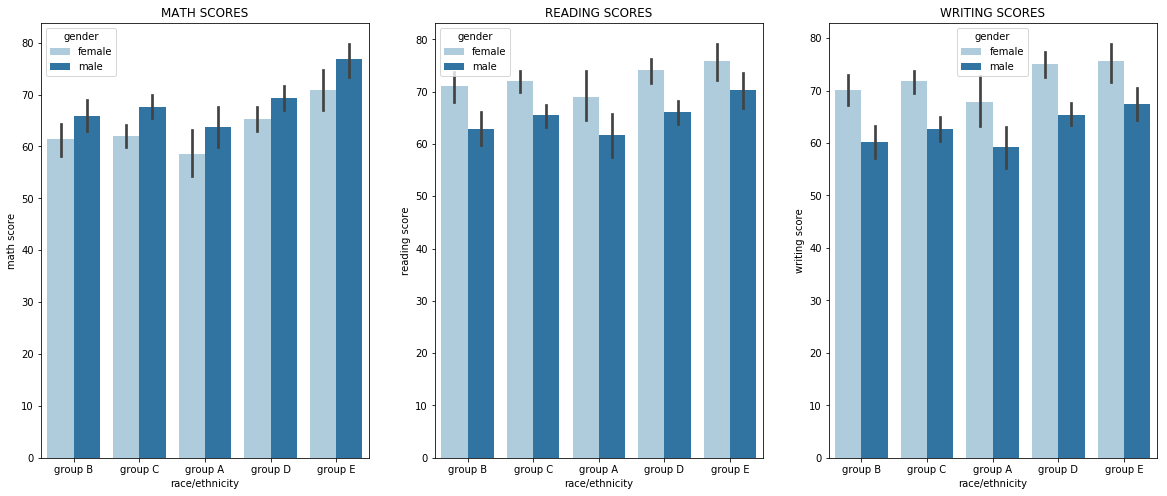

In [48]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.barplot(x='race/ethnicity',y='math score',data=df,hue='gender',palette='Paired')
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.barplot(x='race/ethnicity',y='reading score',data=df,hue='gender',palette='Paired')
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.barplot(x='race/ethnicity',y='writing score',data=df,hue='gender',palette='Paired')
plt.show()

# Машинное обучение

## Решим задачу предсказания сдачи/несдачи студентом теста по известной информации.

In [49]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Math_PassStatus', 'Reading_PassStatus',
       'Writing_PassStatus', 'OverAll_PassStatus', 'Total_Marks', 'Percentage',
       'Grade'],
      dtype='object')

Закодируем с помощью OneHotEncoding категориальные признаки

In [50]:
base = pd.get_dummies(df,columns=['gender','race/ethnicity','parental level of education','test preparation course',\
                                  'lunch'],dtype = int)
base.sample()
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
math score                                        1000 non-null int64
reading score                                     1000 non-null int64
writing score                                     1000 non-null int64
Math_PassStatus                                   1000 non-null object
Reading_PassStatus                                1000 non-null object
Writing_PassStatus                                1000 non-null object
OverAll_PassStatus                                1000 non-null object
Total_Marks                                       1000 non-null int64
Percentage                                        1000 non-null float64
Grade                                             1000 non-null object
gender_female                                     1000 non-null int32
gender_male                                       1000 non-null int32
race/ethnicity_group A                         

In [51]:
base.head()

,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Total_Marks,Percentage,Grade,...,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,test preparation course_completed,test preparation course_none,lunch_free/reduced,lunch_standard
0,72,72,74,P,P,P,P,218,72.666667,B,...,0,1,0,0,0,0,0,1,0,1
1,69,90,88,P,P,P,P,247,82.333333,A,...,0,0,0,0,1,0,1,0,0,1
2,90,95,93,P,P,P,P,278,92.666667,A,...,0,0,0,1,0,0,0,1,0,1
3,47,57,44,P,P,P,P,148,49.333333,E,...,1,0,0,0,0,0,0,1,1,0
4,76,78,75,P,P,P,P,229,76.333333,B,...,0,0,0,0,1,0,0,1,0,1


## Создадим обучающую матрицу и столбец с целевой переменной.

Создайте матрицу признаков X, состоящую только из закодированных признаков.

Создайте целевой вектор y, в котором для каждого студента стоит 1, его OverAll_PassStatus равен 'P', и 0 иначе.

In [58]:
#your code here
X = base[base.columns[10:]]
X.head()
y = [1 if x == 'P' else 0 for x in df['OverAll_PassStatus']]

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

train_x,test_x,train_y,test_y = train_test_split(X,y,test_size = 0.05)

model = LogisticRegression()
model.fit(train_x,train_y)

target = model.predict(test_x)

accuracy_score(target,test_y)

C:\Users\elena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.94

### Посмотрим, не переобучился ли наш алгоритм

Для этого:

1) посмотрим на качество алгоритма на обучающих данных и на тестовых данных

2) запустим обучение и предсказание несколько раз для разных разбиений и посмотрим на стабильность предсказаний (на метрику)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.15)

model = LogisticRegression()
model.fit(train_x,train_y)

target_train = model.predict(train_x)
target_test = model.predict(test_x)

print('score on train: {0}, score on test: {1}'.format(accuracy_score(target_train,train_y),accuracy_score(target_test,test_y)))

### Попробуйте использовать другой классификатор - решающее дерево.

А он переобучается?

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#your code here

## Теперь решим задачу регрессии: предскажем суммарный балл каждого студента за тест.

Создайте целевой вектор y2, равный столбцу Percentage

In [ ]:
#your code here

Обучите линейную регрессию для решения данной задаче по аналогии с предыдущим примером классификации.

Сделайте предсказние на тестовой части.

Выведите качество предсказания (средеквадратичную ошибку - MSE).

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

#your code here

### Аналогично предыдущей задаче проверьте, не переобучается ли ваш алгоритм

In [ ]:
#your code here